## Отчет по лабораторной работе №3
## по дисциплине: «Машинное обучение»
## на тему: «Предварительная обработка данных»
## Вариант №17

## Выполнил: Семехин В.Д. 19-ИВТ-3

Цель работы: получение навыков работы с методами классификации.

Текст задания:

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

## 1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);
## 3 – линейный классификатор (персептрон);

In [87]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn import metrics
%matplotlib inline

iris_df = pd.read_csv('iris.csv')

In [88]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [89]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## 1. Описание набора данных на русском:
    1. SepalLenghtCm - Длинна чашелистика в см
    2. SepalWidthCm  - Ширина чашелистика в см 
    3. PetalLengthCm - Длинна лепестка в см
    4. PetalWidthCm  - Ширин лепестка в см
    5. Species       - Вид растения

## 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [90]:
# Размер DF до удаление дубликатов 
print('Количество строк DF до удаление дубликатов ', iris_df.shape[0])
# Размер после удаления дубликатов
print('Количество строк после удаления дубликатов', iris_df.dropna().drop_duplicates().shape[0])

Количество строк DF до удаление дубликатов  150
Количество строк после удаления дубликатов 147


## 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:xlabel='count', ylabel='Species'>

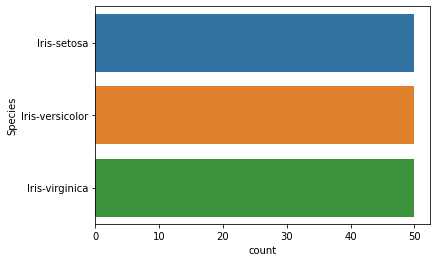

In [91]:
sns.countplot(data = iris_df, y='Species')

## 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [92]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


В рассматриваемой DataFrame лишь один признак я вляется категориальным, а именно, признак, отвечающий за вид растения.

Выполним замену признака с помощью Label Encoder:

In [93]:
# Данный список будет хранить в себе стлобцы численных признаков
# Для дальнейшнего использования
num_attribute = []
for col in iris_df.columns:
    if iris_df[col].dtype.name != 'object':
        num_attribute.append(col)
num_attribute

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [94]:
# Создаем Label encoder
label_encoder = LabelEncoder()
# Используем для преобразования столбца 'Species'
iris_df['Species'] = pd.Series(label_encoder.fit_transform(iris_df['Species']))
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [95]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

Для масштабирования количественных признаков используем диаграмму ящик с усами:

In [96]:
df_iris_saved = iris_df.copy()

In [97]:
species = df_iris_saved['Species']

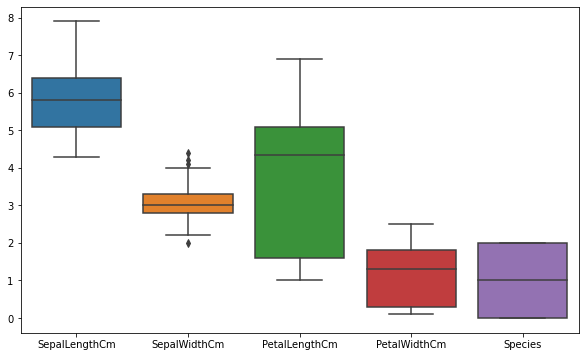

In [98]:
# задаем размер фигур
plt.figure(figsize=(10,6))
# Указываем, откуда брать иформацию для построеня графика
sns.boxplot(data=iris_df)
# Отображаем график
plt.show()

In [140]:
# Масштабирование данныx при помощи MinMaxScaler
# Для каждого значения в объекте MinMaxScaler вычитает минимальное значение в объекте и затем делит на диапазон.
# Диапазон - это разница между исходным максимумом и исходным минимумом.
scaler = preprocessing.MinMaxScaler()

iris_df[num_attribute] = scaler.fit_transform(iris_df[num_attribute])

iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


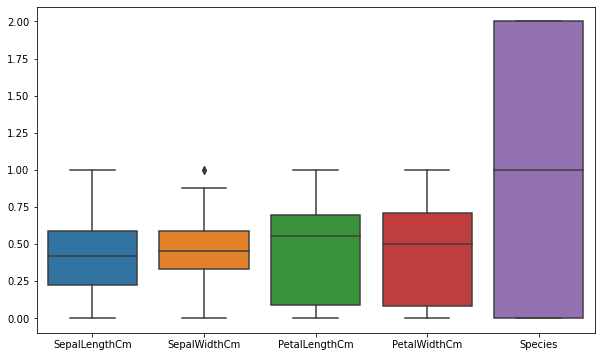

In [141]:
# Диаграмма "ящик с усами" после масштабирования
plt.figure(figsize=(10,6))
sns.boxplot(data=iris_df)
plt.show()

## 6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

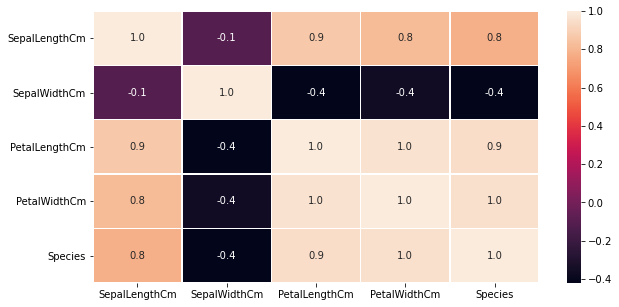

In [101]:
# Положимельный коэф корреляции - прямая зависимость между признаками
# Отрицательный коэф корреляции - обратная зависимость между признаками
# Коэф корреляуии близкий к 0 - признаки не зависимы
# Используем метод corr() для вычисления корреляции Пирсона
corr = iris_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)
# fmt - Код форматирования строк для использования при добавлении аннотаций.
# linewidths - ширина линий, разделяющих ячейки

<AxesSubplot:>

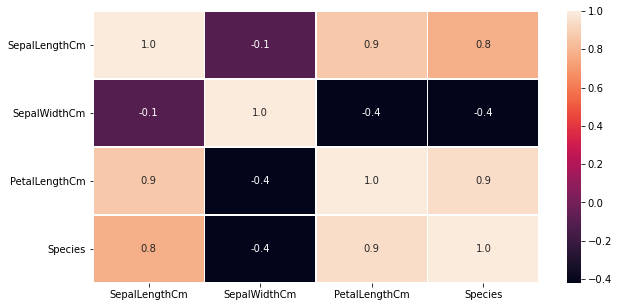

In [102]:
# Удаляем признак, который коррелирует с наибольшим числом других 
# Больше всего единиц
corr = iris_df.drop('PetalWidthCm', axis=1).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)

## 7. Заполните пропущенные значения в данных;

In [103]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Пропущенных значений нет

## 8. Решите поставленную задачу классификации в соответствии с заданием.

Классификатор k ближайших соседей (Задается количество ближайших объектов)

In [106]:
# Разделение выборки на тренировочную и тестовую части
dfTest = iris_df[33:120]

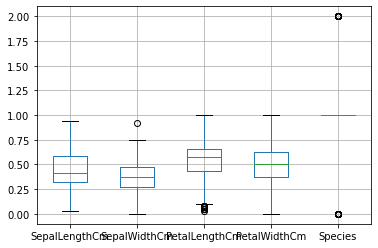

In [107]:
# Проведем нормализацию 
dfTest.boxplot()
plt.show()

In [108]:
# Создаем отдельную переменную, храняшую в себе численные признаки
numerical_columns = [i for i in dfTest.columns[1:5] if dfTest[i].dtype.name != 'object']
# Аналогичная переменная, но хранить уже будет категориальные признаки
categorial_columns = [i for i in dfTest.columns[1:5] if dfTest[i].dtype.name == 'object']
# Объявляем MinMaxScaler
scaler = MinMaxScaler()

#Эта оценка масштабирует и переводит каждую функцию по отдельности так, 
# Чтобы она находилась в заданном диапазоне на обучающем наборе, 
# то есть между нулем и одним.
# Это преобразование часто используется как альтернатива нулевому 
# среднему масштабу масштабирования единиц.

dfTest[numerical_columns] = scaler.fit_transform(dfTest[numerical_columns])
# Выводим заголовок получившегося DF
dfTest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
33,0.333333,1.000000,0.035088,0.041667,0.0
34,0.166667,0.500000,0.052632,0.000000,0.0
35,0.194444,0.545455,0.000000,0.041667,0.0
36,0.333333,0.681818,0.017544,0.041667,0.0
37,0.166667,0.500000,0.052632,0.000000,0.0


In [110]:
dfTest.count()
# Пропущенных значений не наблюдается 

SepalLengthCm    87
SepalWidthCm     87
PetalLengthCm    87
PetalWidthCm     87
Species          87
dtype: int64

In [111]:
dfTest['Species'] = species

## Классификация методом к ближайших соседей

In [132]:
# Создаем тренировочную сборку
train_x, test_x, train_y, test_y = train_test_split(iris_df.drop('Species', axis=1).values, 
                                                    iris_df['Species'].values, 
                                                    test_size=0.3,
                                                    random_state = 10)

In [133]:
# test_y = dfTest['Species']
# test_x = dfTest.drop('Species', axis=1)

In [134]:
# Определеяем Классификатор к ближайших соседей
knn = KNeighborsClassifier()

#найдем оптимальные параметры для классификатора
# Указываем эстиматор
#n_neighbors - количество соседей
knn_grid = GridSearchCV(knn,dict(n_neighbors=[x for x in range(1,50)]))
# Первая передача данных для тренировки
knn_grid.fit(train_x, train_y)
# определяем лучший результат
selected_n_neighbors = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_
print('best train score: ', best_score,'| at neighbors number: ', selected_n_neighbors)

#создаем модель knn по нашим оптимальным данным
knn = KNeighborsClassifier(n_neighbors=selected_n_neighbors)
#тренируем ее
knn.fit(train_x, train_y)
#смотрим в каком проценте случаев классификатор дает верный результат
# mean == среднее значение 
best_score  = np.mean(train_y  == knn.predict(train_x))
print('test score: ', best_score)

best train score:  0.9619047619047618 | at neighbors number:  7
test score:  0.9714285714285714


## Классификация персептроном

In [135]:
# Определеям персептрон
slf = Perceptron()
#найдем оптимальные параметры для классификатора
#alfa - Константа, которая умножает член регуляризации
#max_iter - Максимальное количество проходов над данными обучения (иначе говоря, эпохи)
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,1,20)[1:],max_iter=[x for x in range(1,50)]), n_jobs=-1)
paramsearch.fit(train_x, train_y)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('best score:',best_score,'| alpha:',selected_alpha, '| max_iter:', selected_max_iter)

#создаем модель персептрона по нашим оптимальным данным
perceptron = sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
#тренируем ее
perceptron.fit(train_x, train_y)
#смотрим в каком проценте случаев классификатор дает верный результат
test_score  = np.mean(train_y == perceptron.predict(train_x))
print('test score: ', test_score)

best score: 0.780952380952381 | alpha: 0.05263157894736842 | max_iter: 7
test score:  0.7619047619047619


In [136]:
from sklearn.calibration import CalibratedClassifierCV
plt.figure(figsize=(10,8))
y_test_invers = []
    
probas_knn = knn.fit(train_x, train_y).predict_proba(test_x)

#Откалибруем линейный классификатор
#cv - кратность перекрестной проверки
#method - метод калибровки, так как у нас записей больше 1000 то рекомендуется использовать isotonic
# если же данных << 1000 то sigmoid
clf_sigmoid = CalibratedClassifierCV(perceptron, cv=10, method='sigmoid')
clf_sigmoid.fit(train_x, train_y)
probas_slf = clf_sigmoid.predict_proba(test_x)

<Figure size 720x576 with 0 Axes>

In [137]:
from sklearn.preprocessing import label_binarize

In [138]:
y_test_bin = label_binarize(test_y, classes=[0, 1, 2])

## PR кривые

Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов, а затем варьировать границу выбора класса. Вероятности можно получить с помощью метода predict_proba

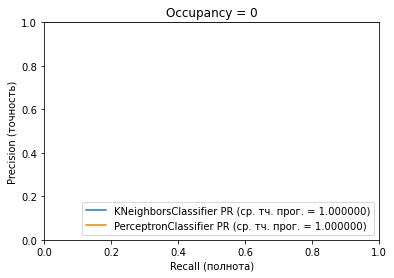

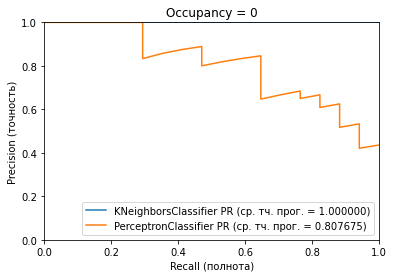

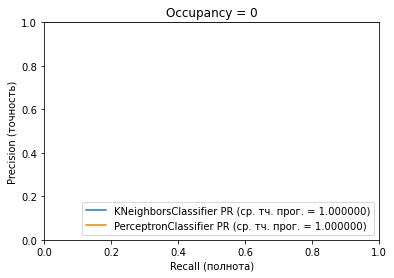

In [139]:
for i in range(3):
    # K соседей
    precision, recall, thresholds = precision_recall_curve(y_test_bin[:, i], probas_knn[:,i])
    aps_knn0 = average_precision_score(y_test_bin[:, i],probas_knn[:,i])
    plt.plot(recall, precision, label='KNeighborsClassifier PR (ср. тч. прог. = %f)' % (aps_knn0)) 

    # Персептрон
    precision, recall, thresholds = precision_recall_curve(y_test_bin[:, i], probas_slf[:,i])
    aps_ptron0 = average_precision_score(y_test_bin[:, i],probas_slf[:,i])
    plt.plot(recall, precision, label='PerceptronClassifier PR (ср. тч. прог. = %f)' % (aps_ptron0)) 

    # вывод графика
    plt.xlabel('Recall (полнота)')
    plt.ylabel('Precision (точность)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc=4, fontsize='medium')
    plt.title('Occupancy = 0')
    plt.show()

## ROC графики


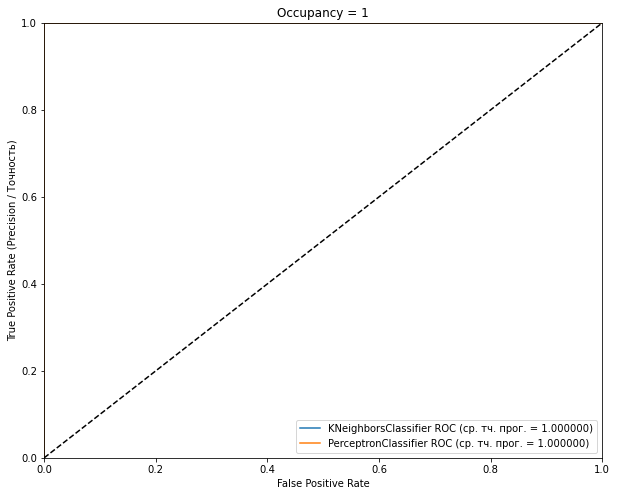

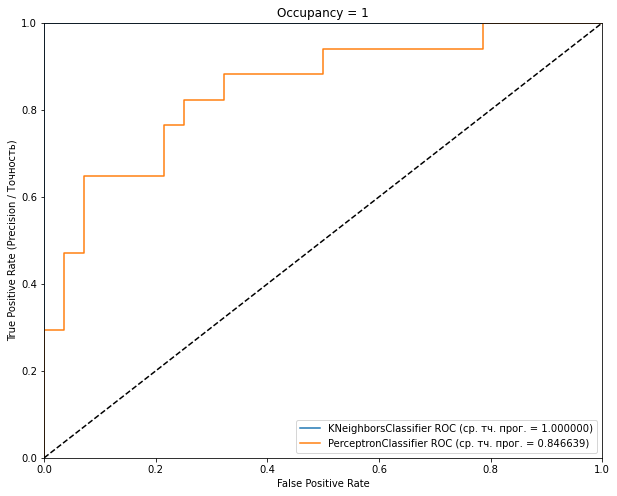

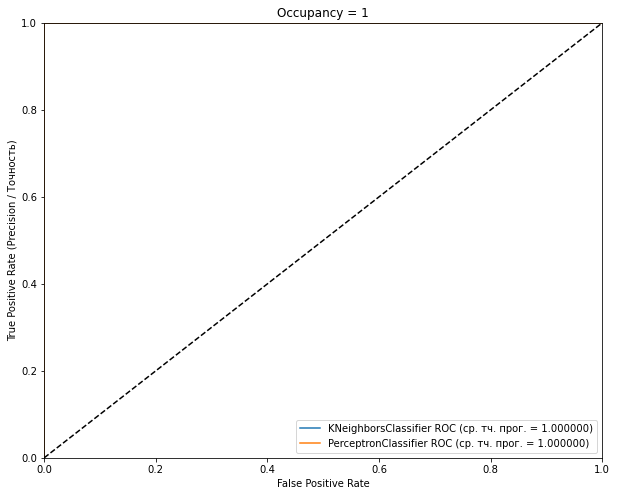

In [131]:
for i in range(3):    
    plt.figure(figsize=(10,8))

    # K соседей
    fpr, tpr, thresholds = roc_curve(y_test_bin[:,i], probas_knn[:,i])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='KNeighborsClassifier ROC (ср. тч. прог. = %f)' % (roc_auc))

    # PerceptronClassifier
    fpr, tpr, thresholds = roc_curve(y_test_bin[:,i], probas_slf[:,i])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='PerceptronClassifier ROC (ср. тч. прог. = %f)' % (roc_auc)) 

    # вывод графика
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Precision / Точность)')
    plt.legend(loc=4, fontsize='medium')
    plt.title('Occupancy = 1')
    plt.show()